<a href="https://colab.research.google.com/github/jm20389/cmt307-g12/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
Github repository: [cmt307-g12](https://github.com/jm20389/cmt307-g12)

| Name     | Surname  | Student number | e-mail                                                                    |
|----------|----------|----------------|---------------------------------------------------------------------------|
| Matthew  | Esposito | 1845089        | [EspositoMD1@cardiff.ac.uk](mailto:EspositoMD1@cardiff.ac.uk)             |
| Chuntong | Huang    | 21088486       | [HuangC31@cardiff.ac.uk](mailto:HuangC31@cardiff.ac.uk)                   |
| Matthew  | Jepson   | 1723843        | [JepsonMW@cardiff.ac.uk](mailto:JepsonMW@cardiff.ac.uk)                   |
| Guoyi    | Jia      | 2023373        | [JiaG@cardiff.ac.uk](mailto:JiaG@cardiff.ac.uk)                           |
| Zhicong  | Tang     | 21112568       | [TangZ19@cardiff.ac.uk](mailto:TangZ19@cardiff.ac.uk)                     |
| Hekang   | Zhang    | 21040520       | [ZhangH120@cardiff.ac.uk](mailto:ZhangH120@cardiff.ac.uk)                 |
| Xiaoling | Zhu      |                | [ZhuX41@cardiff.ac.uk](mailto:ZhuX41@cardiff.ac.uk)                       |
| Jose     | Mendoza  | 21015647       | [mendoza-jimenezjc@cardiff.ac.uk](mailto:mendoza-jimenezjc@cardiff.ac.uk) |

<a class="anchor" id="index"></a>
Contents
======
***
*Note: Dynamic links were set up to run on Jupyter Notebook and may not work on Google Colab or Github.*
## [0. Project setup](#0)
<br/>

### [0.1 Import required modules](#0_1)

### [0.2 Source train and test image files](#0_2)
<br/>

### [0.3 Training set](#0_3)
#### [0.3.1 Obtain category names](#0_3_1)
#### [0.3.2 Label all training pictures](#0_3_2)
#### [0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array](#0_3_3)
#### [0.3.4 Build training dataset](#0_3_4)
#### [0.3.5 Create a summary file for exploratory data analysis](#0_3_5)
<br/>

### [0.4 Test set](#0_4)


<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load](#1_0)
### [1.1. Exploratory data analysis](#1_1)
<br/>

### [1.2. Data visualization](#1_2)
#### [1.2.1 Average picture area](#1_2_1)
#### [1.2.2 Number of pictures per category](#1_2_2)
#### [1.2.3 Boxplot of picture intensity per category](#1_2_3)
#### [1.2.4 Distribution of pixel intensity per category](#1_2_4)
#### [1.2.5 Visualize 5 random pictures](#1_2_5)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
#### [2.1.1 Resize pictures](#2_1_1)
#### [2.1.2 Shuffle train pictures](#2_1_2)
#### [2.1.3 Split training set into tran and validation set](#2_1_3)
<br/>

### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0 Project setup
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>



## 0.0 How to run this script:

You must have found this script inside the folder *cmt307-g12*. For this script to run, you must include a **data** folder the same directory (cmt307-g12 folder).The **data** folder can be downloaded using this link:<br/>
https://cf-my.sharepoint.com/:f:/g/personal/mendoza-jimenezjc_cardiff_ac_uk/EoB0DfS8H_BJi1zNCLRflaIBlJUCf2_NRco5yRzg5gAN_w
<br/>

Inside *data*, there should be two subfolders, called **train** and **test**. These are the folders containing the ppm pictures for this project. The rest of files within *data* are optional checkpoint files.
<br/>

The script is capable of detecting whether you are working locally or in Colab, and will adjust the data directory addresses accordingly (section 0.2).

***
<br/>

<br/>

### Option A - Run locally using Jupyter Notebooks:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
Then the script can be run using Jupyer Notebooks from whatever location.

<br/>

### Option B - Run using Google Colab:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
For this script to run in Google Colab, **the folder cmt307-g12 must be placed in the ROOT of your Google Drive:**
<br/>
%cd /content/gdrive/MyDrive
<br/>

<br/>

### Option C - Github repository:

This project has been uploaded to github as a repository. You can **clone** this repository in your local machine or in your Google Drive:
<br/>
https://github.com/jm20389/cmt307-g12

If you run this repository in Google Colab, the **repository must be cloned into the root of your Google Drive:**
<br/>


1. In Google Colab, mount your drive first:

- from google.colab import drive
- drive.mount('/content/gdrive')

<br/>

2. Navigate through the Google Drive root:

- %cd /content/gdrive/MyDrive
- !ls

<br/>

3. Clone the repository using Git:

- !git clone https://git_token@github.com/jm20389/cmt307-g12.git

<br/>




***

### Glossary of items (for reference):

<br/>

General data contents:

| **Object name**   | **Type** | **Description**              |**Use**|
|:-----------------:|:--------:|:----------------------------:|:---:|
| data_dir          | String   |  Directory address           |     |
| train_dir         | String   |  Directory address for train pictures           |     |
| test_dir          | String   |  Directory address for test pictures          |     |
| class_names       | List     |  List of traffic sign types (different categories). The **index** of each item corresponds to its **category number**  |     |
| x_train           | np.array |  Array where each item is a decoded picture (numpy array) from the **train** set          |     |
| y_train           | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_train           |     |
| y_train_names     | np.array |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_train. Obtained using *class_names*           |     |
| x_test            | np.array |  Array where each item is a decoded picture (numpy array) from the **test** set            |     |
| y_test            | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_test            |     |
| y_test_names      | np.array |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_test. Obtained using *class_names*           |     |
| x_train_resized   | np.array |  Contents from **x_train** after resizing the pictures to img_width * img_height           |     |
| X_train           | np.array |  Set of **train pictures** retrieved from **x_train**, after splitting x_train into train and validation set           |     |
| Y_train           | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_train           |     |
| X_val             | np.array |  Set of **validation pictures** retrieved from **x_train**, after splitting x_train into train and validation set           |     |
| Y_val             | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_val           |     |


<br/>
<br/>

Exploratory data analysis:


| Object name       | Type             | Description | Use |
|:-----------------:|:----------------:|:-----------:|:---:|
| train_summary_df  | pandas dataframe | summary table for exploratory data analysis       |     |
| df_pixels         | pandas dataframe | summary table for exploratory data analysis       |     |

<br/>
<br/>

Image classification (Task 3):

| Object name | Type        | Description | Use |
|:-----------:|:-----------:|:-----------:|:---:|
| model       | keras model | CNN model             |     |


## 0.1 Import required modules
<a class="anchor" id="0_1"></a>
#### [Return to index](#main_title)

In [ ]:
# General modules:
import numpy as np
from numpy import save
from numpy import load
import os
import random

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [ ]:
# Machine learning module
import tensorflow as tf
import keras

## 0.2 Source train and test image files
<a class="anchor" id="0_2"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories


In [ ]:
import sys

if 'google.colab' in sys.modules:
    
    from google.colab import drive 
    drive.mount('/content/gdrive')

    cmt307g12_dir = "/content/gdrive/My Drive/cmt307-g12/"
    data_dir = "/content/gdrive/My Drive/cmt307-g12/data/" 
    train_dir = "/content/gdrive/My Drive/cmt307-g12/data/train/"
    test_dir = "/content/gdrive/My Drive/cmt307-g12/data/test/"

else:
    cmt307g12_dir = ""
    data_dir = "data/"
    train_dir = "data/train/"
    test_dir = "data/test/"
    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 0.3 Training set
<a class="anchor" id="0_3"></a>
#### [Return to index](#main_title)

Decode ppm pictures into numpy arrays

### 0.3.1 Obtain category names
<a class="anchor" id="0_3_1"></a>
#### [Return to index](#main_title)
Below there is a python list containing the names of each category (category = traffic sign). The **index** from each item in the list corresponds to its **category number**. For example, category ID 0 corresponds to the traffic sign "Max Speed 20 km/h", category ID 1 corresponds to the traffic sign "Max Speed 30 km/h", etc.

|            **Category name**            | **Category number** |
|:---------------------------------------:|:-------------------:|
|            Max Speed 20 km/h            |          0          |
|            Max Speed 30 km/h            |          1          |
|            Max Speed 50 km/h            |          2          |
|            Max Speed 60 km/h            |          3          |
|            Max Speed 70 km/h            |          4          |
|            Max Speed 80 km/h            |          5          |
|           End of 80 km/h zone           |          6          |
|            Max Speed 100 km/h           |          7          |
|            Max Speed 120 km/h           |          8          |
|                No passing               |          9          |
| No passing for vehicles over 3.5 tonnes |          10         |
|                 Priority                |          11         |
|              Priority road              |          12         |
|                  Yield                  |          13         |
|                   Stop                  |          14         |
|               Road closed               |          15         |
|   Vehicles over 3.5 tonnes prohibited   |          16         |
|               Do not enter              |          17         |
|              General danger             |          18         |
|                Left curve               |          19         |
|               Right curve               |          20         |
|               Double curve              |          21         |
|           Uneven road surface           |          22         |
|        Slippery when wet or dirty       |          23         |
|               Road narrows              |          24         |
|                Roadworks                |          25         |
|          Traffic signals ahead          |          26         |
|               Pedestrians               |          27         |
|            Watch for children           |          28         |
|             Bicycle crossing            |          29         |
|                Ice - snow               |          30         |
|           Wild animal crossing          |          31         |
|         End of all restrictions         |          32         |
|             Turn right ahead            |          33         |
|             Turn left ahead             |          34         |
|                Ahead only               |          35         |
|         Ahead or turn right only        |          36         |
|         Ahead or turn left only         |          37         |
|             Pass by on right            |          38         |
|             Pass by on left             |          39         |
|                Roundabout               |          40         |
|          End of no passing zone         |          41         |
|    End of no passing zone for trucks    |          42         |

In [ ]:
class_names = [
"Max Speed 20 km/h",
"Max Speed 30 km/h",
"Max Speed 50 km/h",
"Max Speed 60 km/h",
"Max Speed 70 km/h",
"Max Speed 80 km/h",
"End of 80 km/h zone",
"Max Speed 100 km/h",
"Max Speed 120 km/h",
"No passing",
"No passing for vehicles over 3.5 tonnes",
"Priority",
"Priority road",
"Yield",
"Stop",
"Road closed",
"Vehicles over 3.5 tonnes prohibited",
"Do not enter",
"General danger",
"Left curve",
"Right curve",
"Double curve",
"Uneven road surface",
"Slippery when wet or dirty",
"Road narrows",
"Roadworks",
"Traffic signals ahead",
"Pedestrians",
"Watch for children",
"Bicycle crossing",
"Ice - snow",
"Wild animal crossing",
"End of all restrictions",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Ahead or turn right only",
"Ahead or turn left only",
"Pass by on right",
"Pass by on left",
"Roundabout",
"End of no passing zone",
"End of no passing zone for trucks"
]

### 0.3.2 Label all training pictures
<a class="anchor" id="0_3_2"></a>
#### [Return to index](#main_title)


In [ ]:
y_train = []
y_train_names = []

for folder in os.listdir(train_dir):
    
    pictures = [pic for pic in os.listdir(train_dir + "/" + folder) if pic.split(".")[-1] == "ppm" ] # filter out non-ppm files
    
    for picture in pictures:
        y_train_names.append(class_names[int(folder)]) # translates ClassId figure into label name, for example class_names[int(000000)] = 'Max Speed 20 km/h'
        y_train.append(int(folder))
        
y_train = np.array(y_train)

### 0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array
<a class="anchor" id="0_3_3"></a>
#### [Return to index](#main_title)


In [ ]:
#Create a filtered list of .ppm files, then call plt.imread on the resulting list.

def PpmToNumpy(directory):
    
    '''
    Given a host directory containing ppm pictures, converts the pictures into a numpy array, returning an array with the whole list of pictures.

    Params:
    String containing a directory address.

    Returns:
    numpy array whose items are decoded ppm pictures (np.array)

    '''

    files = os.listdir(directory)
    files = [file for file in files if file.split(".")[1] == "ppm"] # to ensure only ppm images are called
    
    return np.array([plt.imread(directory + file) for file in files], dtype=object)
                       

### 0.3.4 Build training dataset
<a class="anchor" id="0_3_4"></a>
#### [Return to index](#main_title)


Create a function to save a numpy array externally:

In [ ]:
def SaveNumpy(filename, directory, obj):
  save(directory + filename + ".npy", obj)
  return None

def LoadNumpy(filename, directory):
  return load(directory + filename + ".npy", allow_pickle=True)

Look for checkpoints before attempting to decode **train** images:

In [ ]:
def Recover_x_train():
  return LoadNumpy("all_train_images", data_dir + "numpy/")

In [ ]:
if "all_train_images.npy" in os.listdir(data_dir + "numpy/"):
  x_train = Recover_x_train()

else:

  all_images = [ PpmToNumpy(train_dir + folder + "/") for folder in os.listdir(train_dir)]
  x_train = np.concatenate(all_images, axis=0, out=None, dtype=None, casting="same_kind")

  SaveNumpy("all_train_images", data_dir + "numpy/", x_train)

### 0.3.5 Create a summary file for exploratory data analysis
<a class="anchor" id="0_3_5"></a>
#### [Return to index](#main_title)


In [ ]:
# Train summary file:

if "train_summary.csv" not in os.listdir(data_dir):

  train_summary = dict.fromkeys(["Width", "Height", "ClassId"], [])
  widths = []
  heights = []

  for picture in x_train:
      widths.append(picture.shape[0])
      heights.append(picture.shape[1])

  train_summary["Width"] = widths
  train_summary["Height"] = heights
  train_summary["ClassId"] = y_train
  
  train_summary_df = pd.DataFrame( train_summary)
  train_summary_df.to_csv(data_dir + "train_summary.csv", index = False)
  train_summary_df.head(5)

## 0.4 Test set
<a class="anchor" id="0_4"></a>
#### [Return to index](#main_title)

In [ ]:
test_meta = pd.read_csv(data_dir + "Test.csv")
test_meta.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
y_test =  np.array(test_meta["ClassId"])
y_test_names = np.array(test_meta["ClassId"].apply(lambda x: class_names[x]))

y_test[:10]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35])

Look for checkpoints before attempting to decode **test** images:

In [ ]:
def Recover_x_test():
  return LoadNumpy("all_test_images", data_dir + "numpy/")

In [ ]:
if "all_test_images.npy" in os.listdir(data_dir + "numpy/"):
  x_test = Recover_x_test()

else:
  x_test = PpmToNumpy(test_dir)

  SaveNumpy("all_test_images", data_dir + "numpy/", x_test)

## Function to test picture display, given an array object:

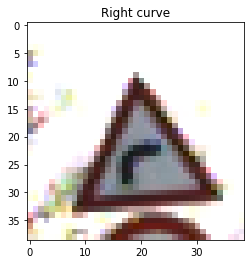

In [ ]:
def PlotPicture(pic_set, pic_labels, index):

  plt.figure()
  plt.imshow(pic_set[index, ], cmap = 'gray')
  plt.title(pic_labels[index])
  plt.show()

PlotPicture(x_test, y_test_names, 5445)

***
# 1 Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)
On step 0.3.5 we built a summary dataframe with the training set of pictures: **train_summary.csv**

In [ ]:
#train_df = pd.read_csv("data/Train.csv")
train_df = pd.read_csv(data_dir + "train_summary.csv")

test_df = pd.read_csv(data_dir + "Test.csv")

train_df.head()

,Width,Height,ClassId
0,30,29,0
1,30,30,0
2,30,30,0
3,31,31,0
4,32,30,0


In [ ]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

,Width,Height,ClassId,Area
0,30,29,0,870
1,30,30,0,900
2,30,30,0,900
3,31,31,0,961
4,32,30,0,960


## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)
<br/>

##### Create a dataframe with summary data per **category** - *train_df_cat*

In [ ]:
train_df_cat = train_df.groupby('ClassId', as_index=False).mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

    ClassId      Width     Height         Area
17       17  40.273874  38.010811  1677.474775
6         6  42.126190  40.404762  1881.604762
42       42  41.291667  41.145833  1885.904167
32       32  41.425000  41.004167  1968.908333
5         5  42.823656  42.515054  2083.274194


## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

### 1.2.1 Average picture area
<a class="anchor" id="1_2_1"></a>
##### [Return to index](#main_title)
<br/>

Create a **barplot** to explore average picture area:

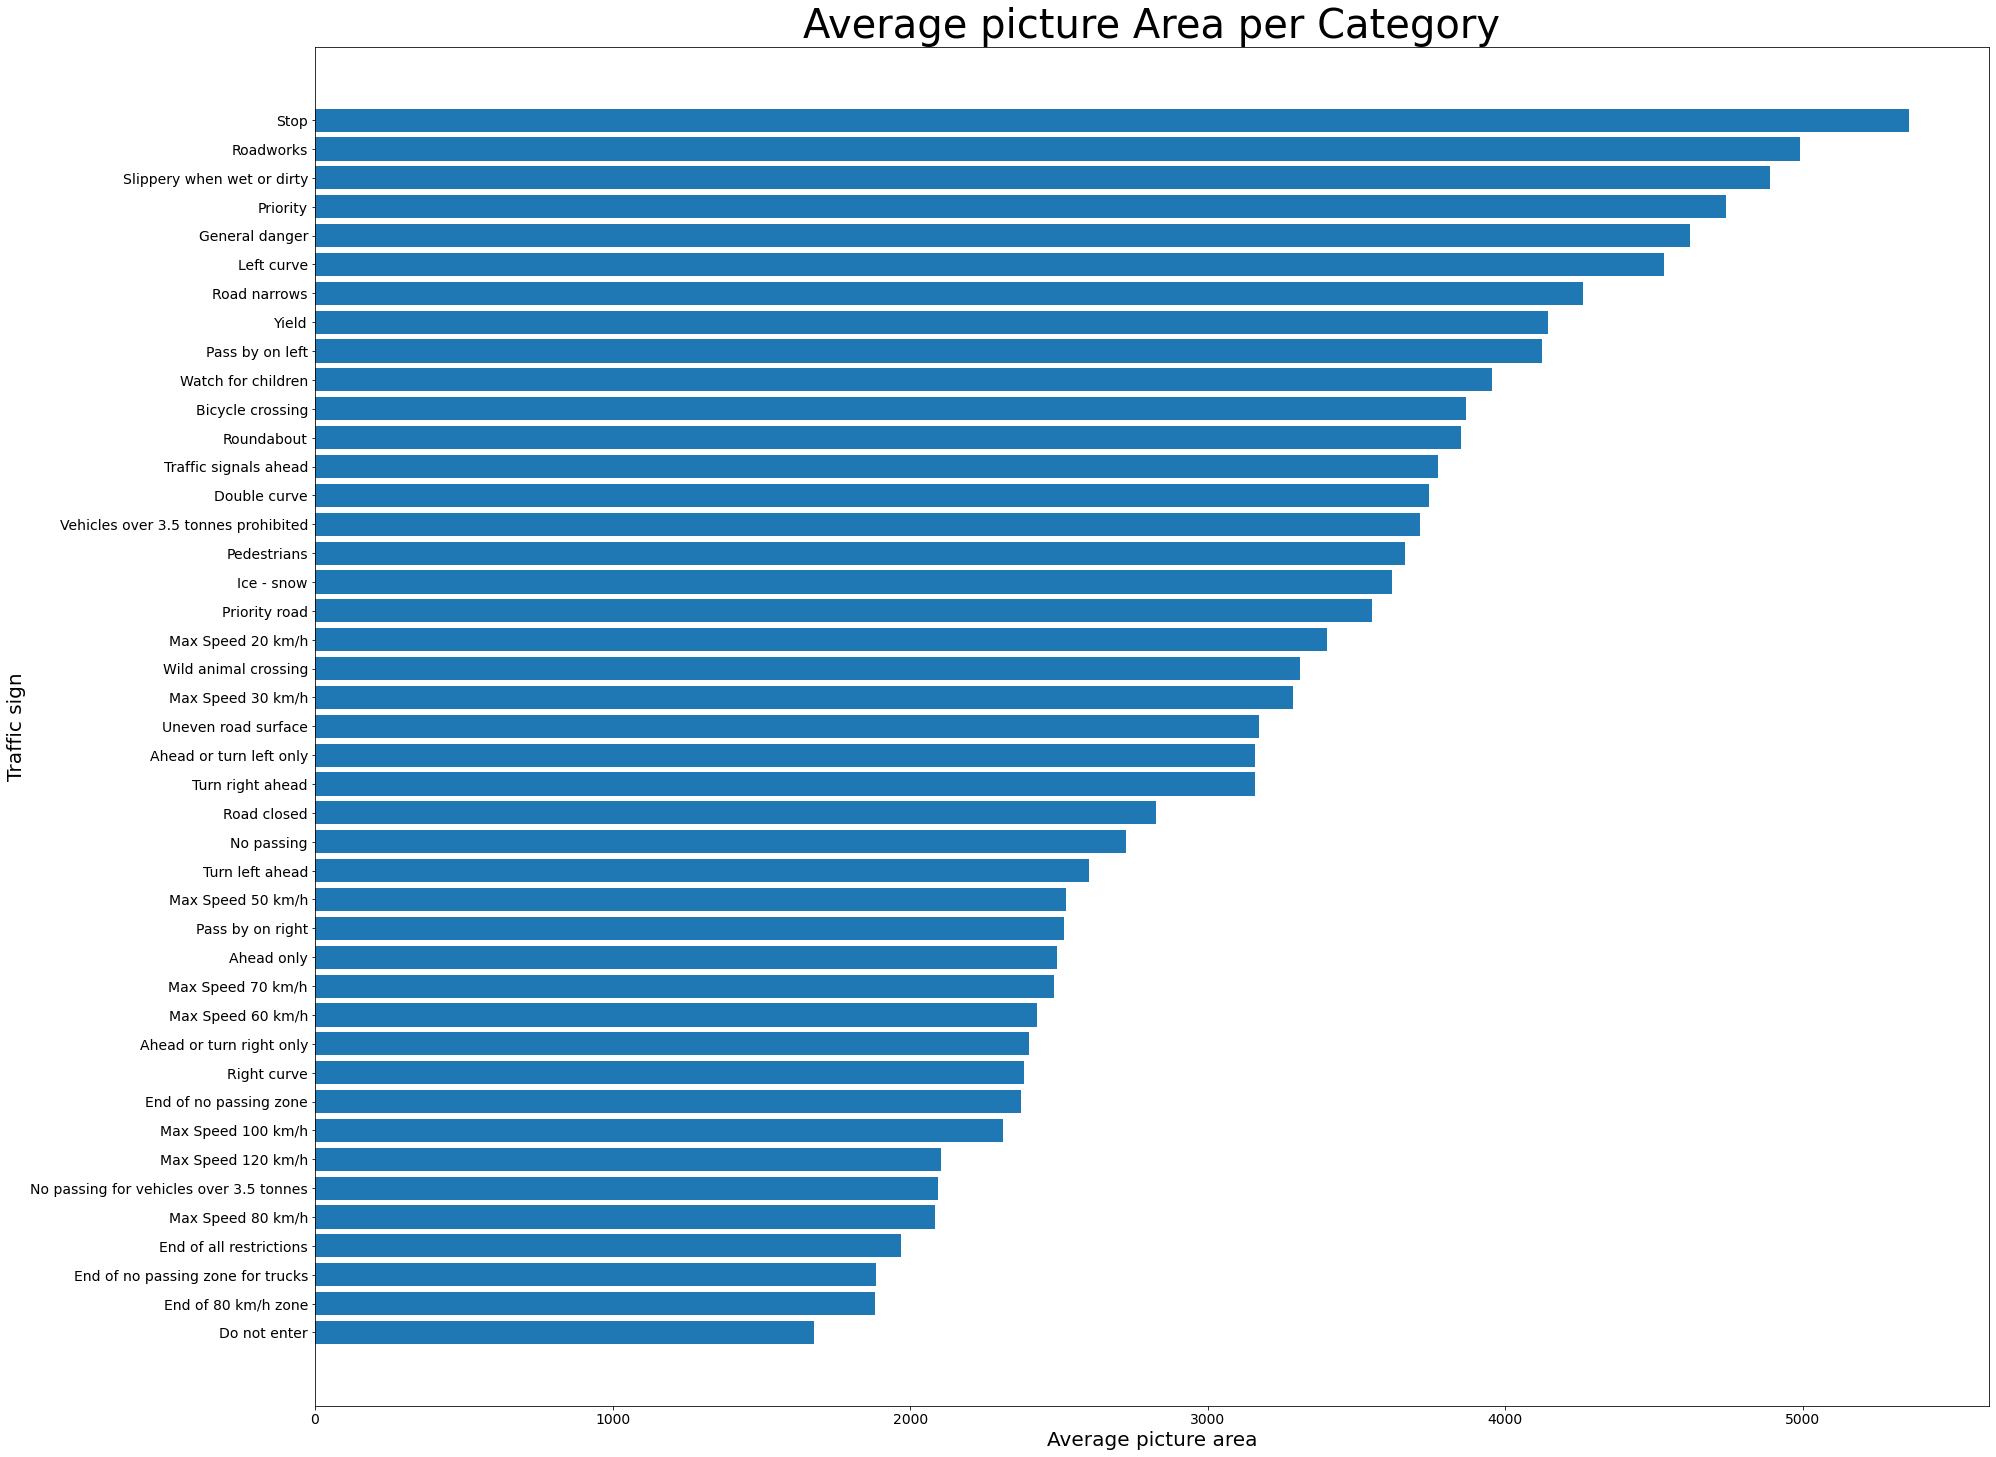

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])

plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/area_barplot.png")

plt.show()


### 1.2.2 Number of pictures per category 
<a class="anchor" id="1_2_2"></a>
#### [Return to index](#main_title)
<br/>

Create a **barplot** to explore number of pictures per category:

In [ ]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)

train_counts[:10]

0     210
19    210
37    210
27    240
32    240
42    240
41    240
24    270
29    270
39    300
Name: ClassId, dtype: int64

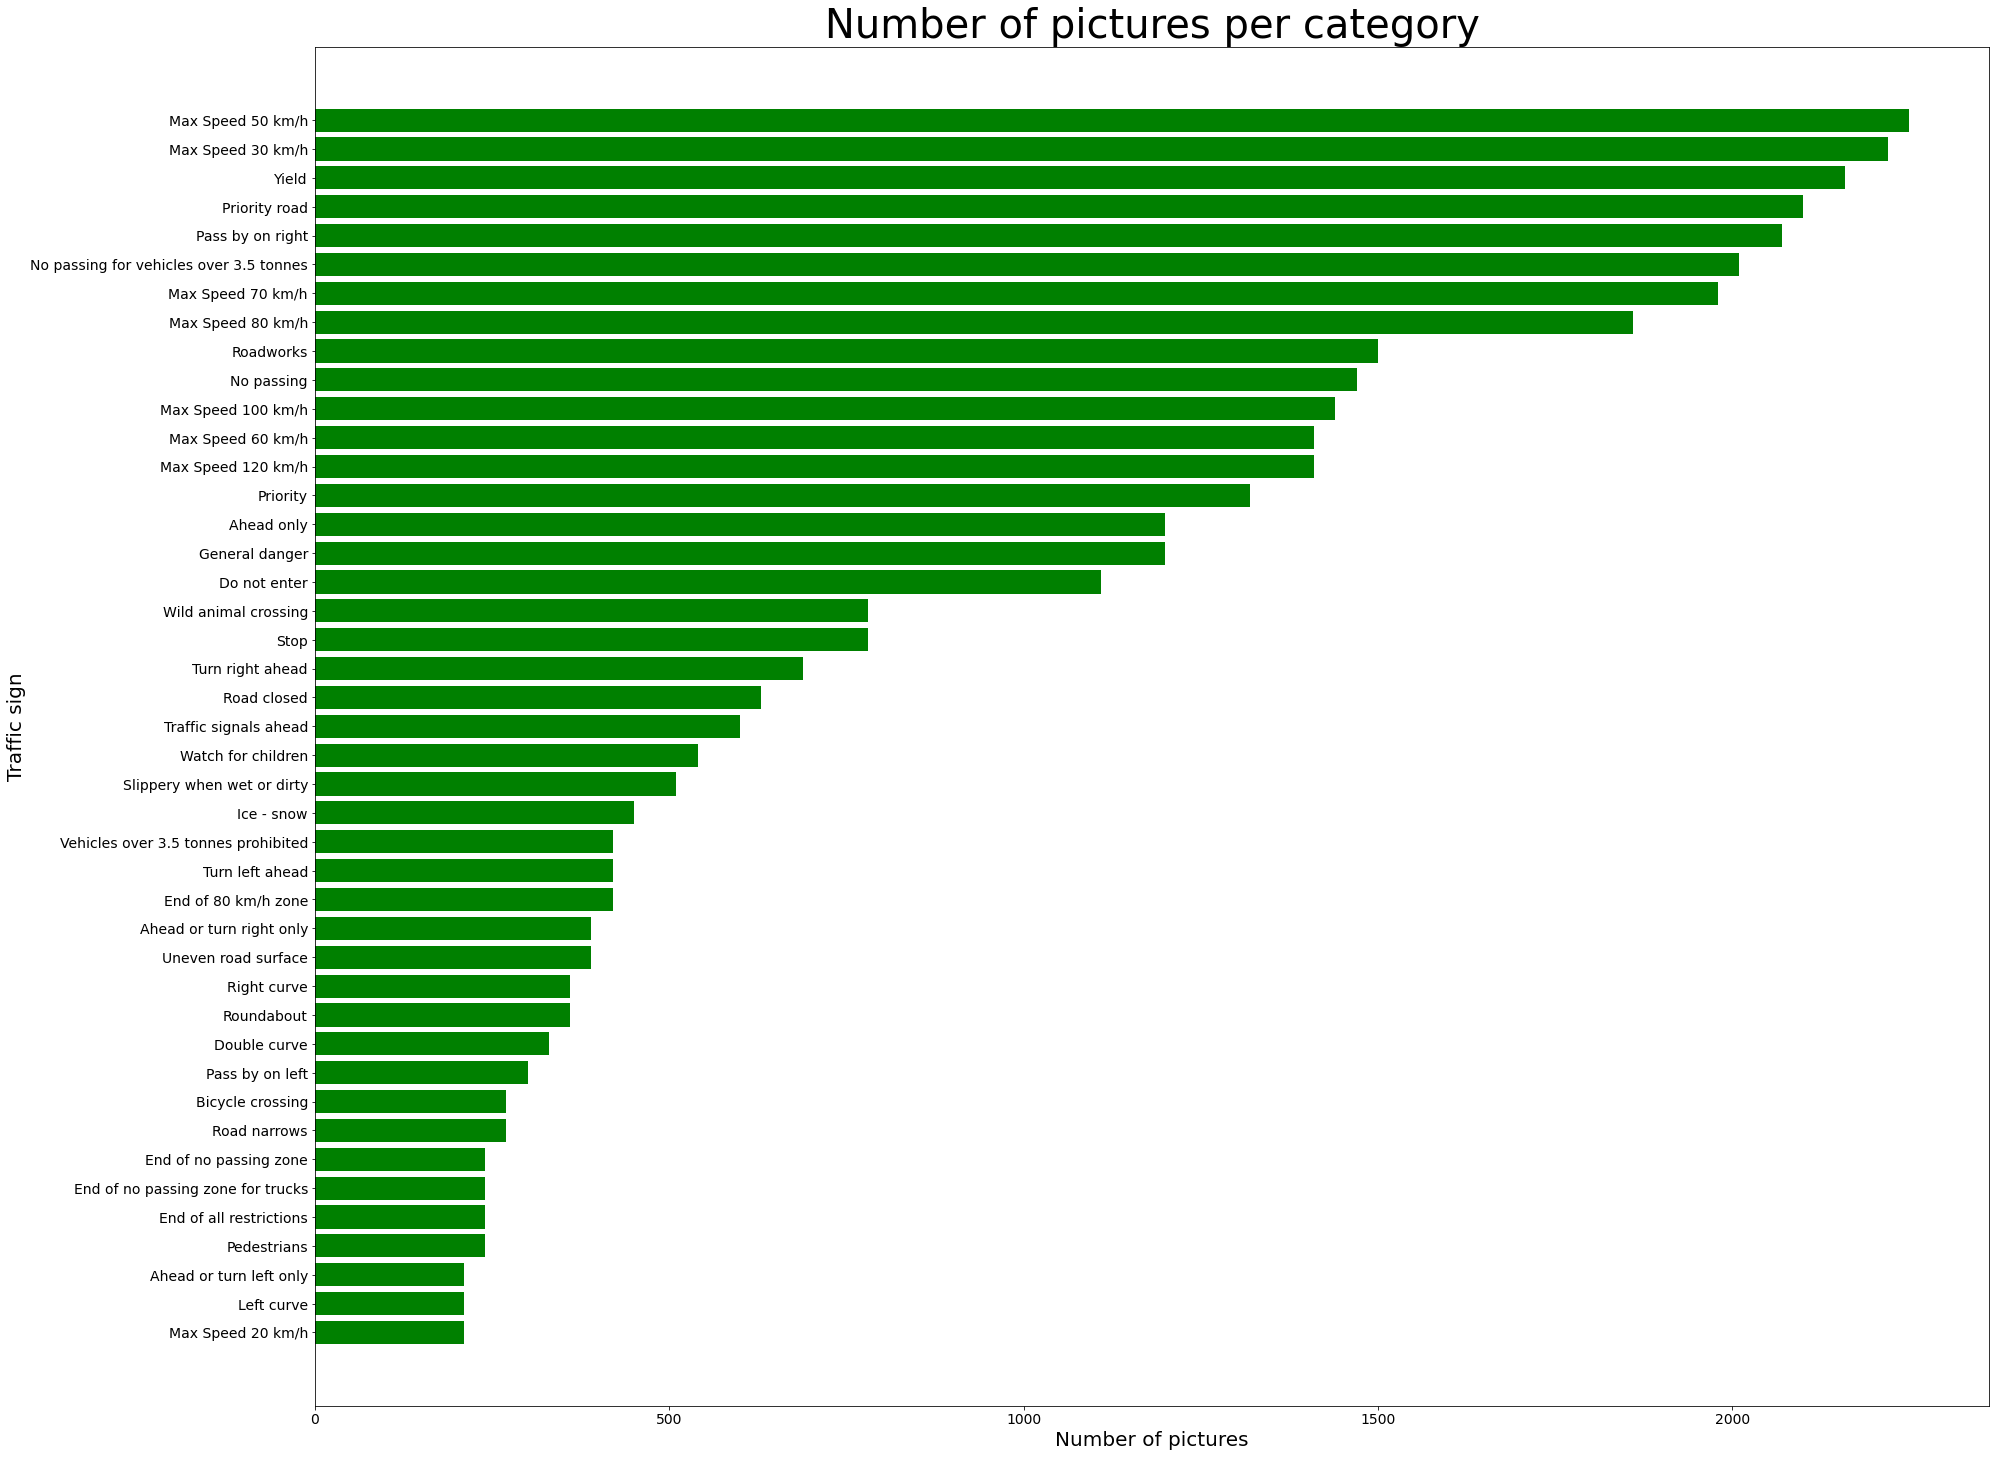

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_counts.index ]
#labels = train_counts.index

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()


### 1.2.3 Boxplot of picture intensity per category 
<a class="anchor" id="1_2_3"></a>
#### [Return to index](#main_title)
<br/>

Box plot of picture's individual average intensity per category:

#### Create a dataframe from decoded train pictures: 
##### *x_train + y_train -> df_pixels*

In [ ]:
pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train_names)), columns=['Picture avg', 'Category']  )


In [ ]:
df_pixels.head(5)

,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h


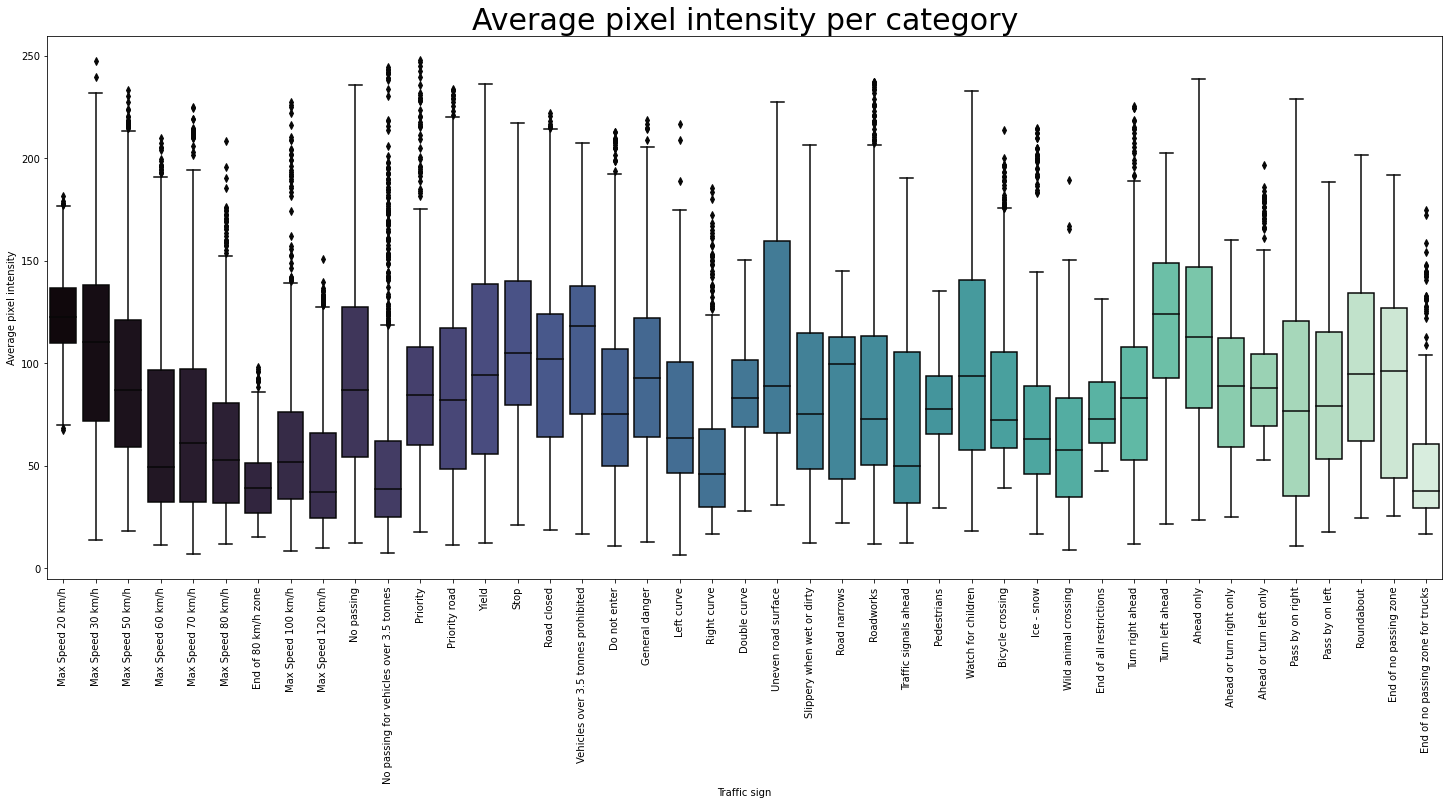

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "mako", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_barplot.png")

plt.show()

### 1.2.4 Distribution of pixel intensity per category 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Distribution of picture's average intensity per category

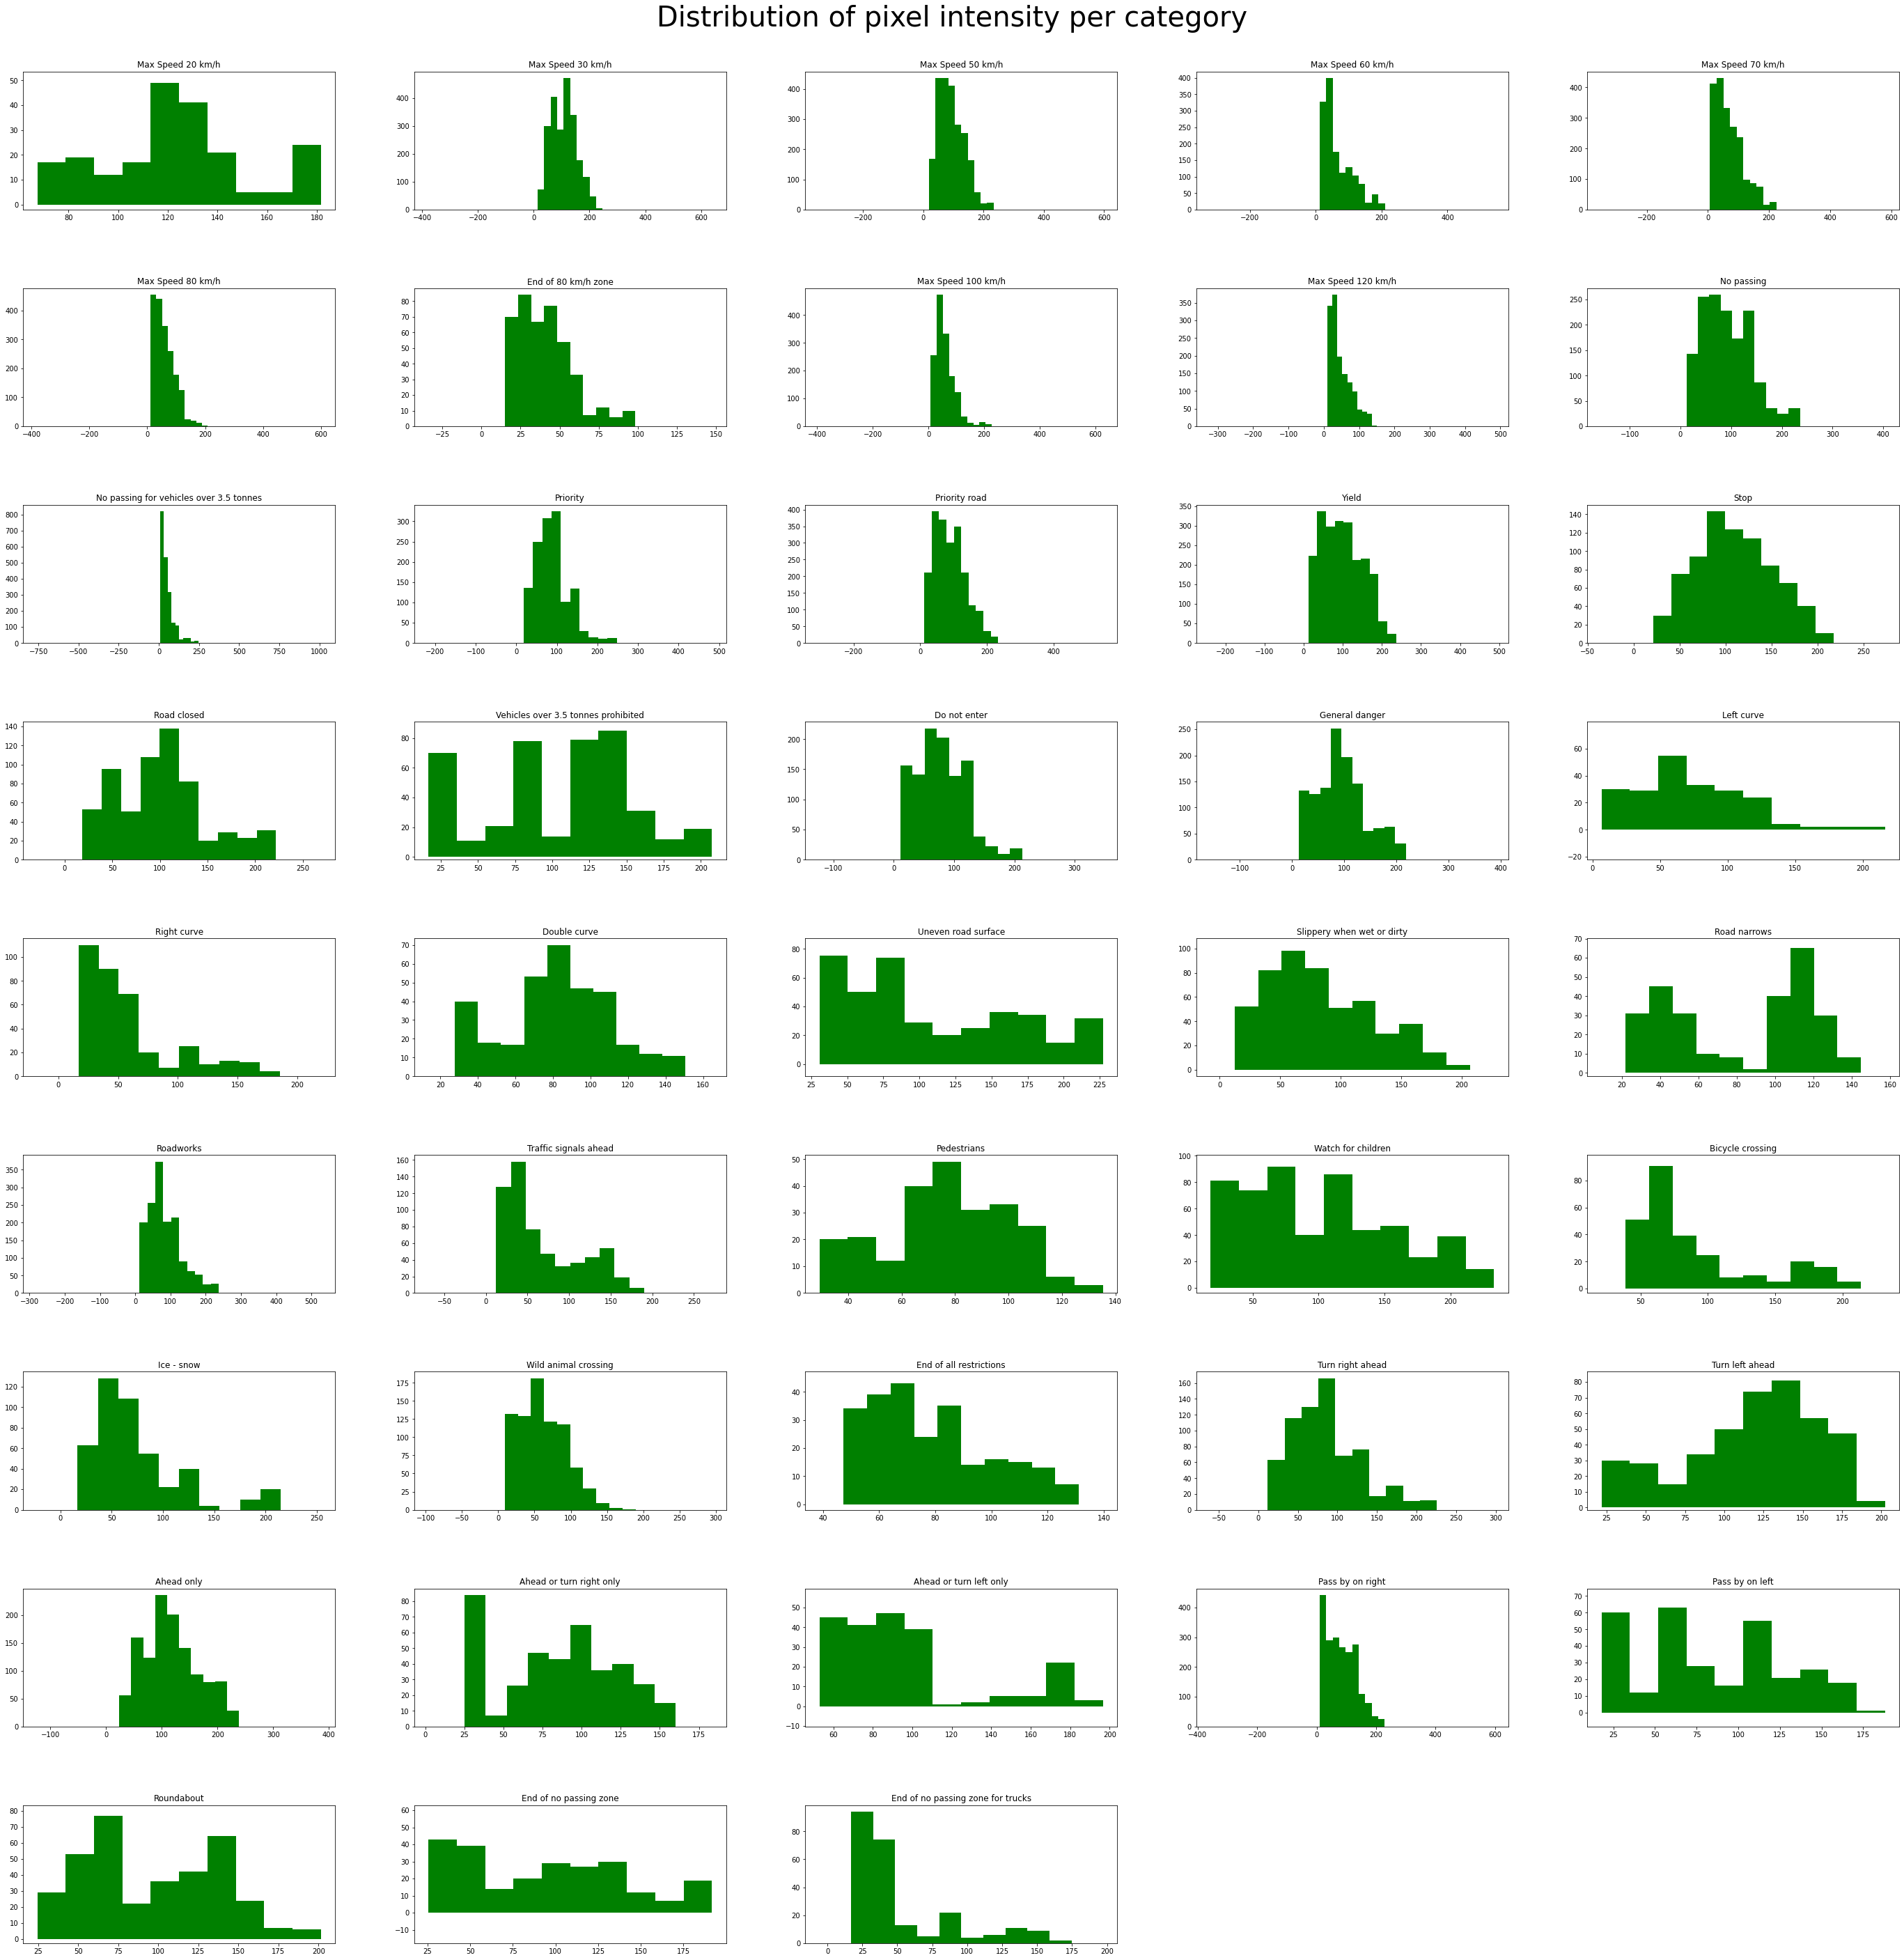

In [ ]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)
        
    fig.set_figheight(40)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    axes[i].hist([values], bins = 10, facecolor = 'green')
    #sns.histplot(values)
    
    axes[i].axis('equal')  
    axes[i].set_title(class_names[i])

    
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_distribution.png")

plt.show()     

### 1.2.5 Visualize 5 random pictures
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Inspect 25 random pictures from the Test directory

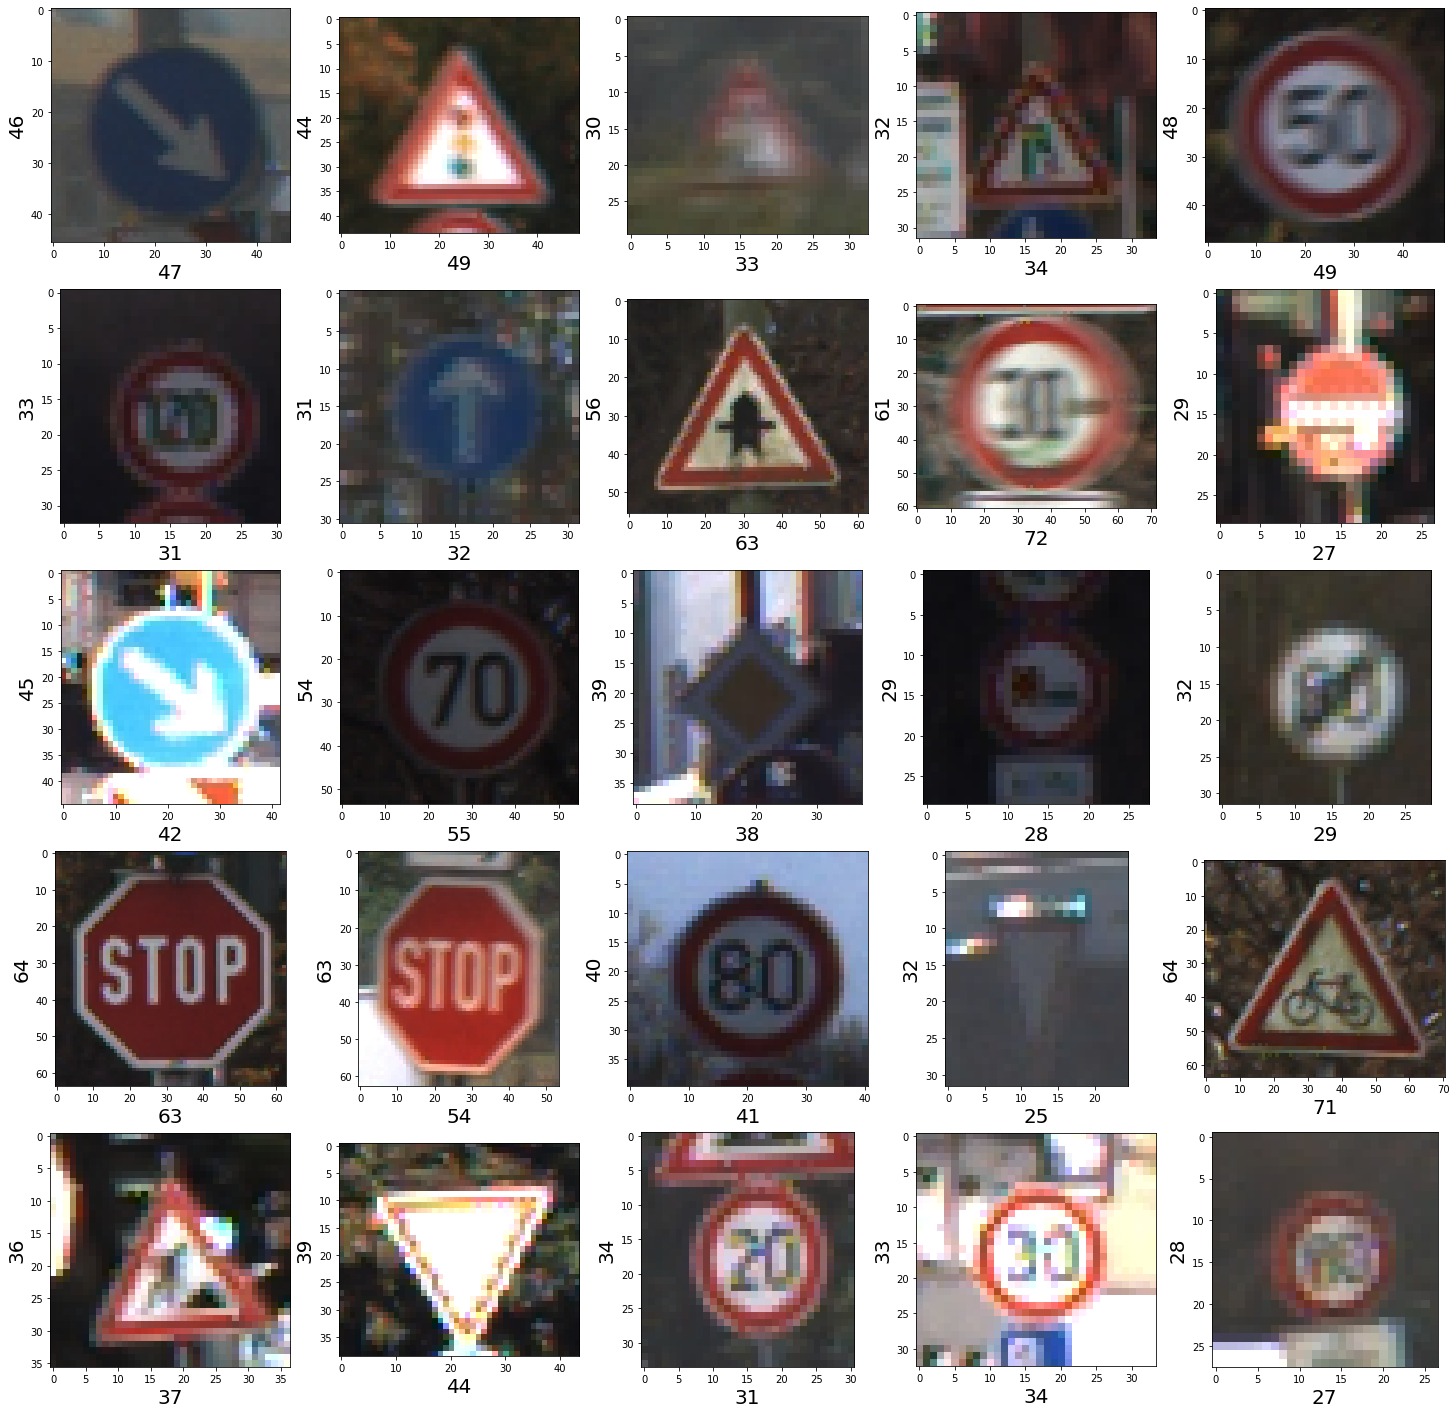

In [ ]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
plt.savefig(cmt307g12_dir + "report/images/random_pictures.png")
    

***
# 2 Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Dataset preprocessing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

### 2.1.1 Resize pictures 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
x_test = Recover_x_test()
x_train = Recover_x_train()

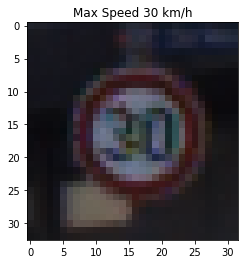

SHAPE:  (33, 32, 3)


array([[[0.1254902 , 0.1372549 , 0.16862745],
        [0.12156863, 0.12941176, 0.15686275],
        [0.12156863, 0.1254902 , 0.16078431],
        ...,
        [0.08235294, 0.10196078, 0.14901961],
        [0.07058824, 0.09803922, 0.14901961],
        [0.06666667, 0.09803922, 0.14901961]],

       [[0.09411765, 0.10196078, 0.1254902 ],
        [0.09803922, 0.10196078, 0.12156863],
        [0.10196078, 0.10196078, 0.1254902 ],
        ...,
        [0.14509804, 0.16470588, 0.21960784],
        [0.12941176, 0.15686275, 0.21176471],
        [0.11372549, 0.14509804, 0.2       ]],

       [[0.09019608, 0.09411765, 0.11764706],
        [0.09411765, 0.09411765, 0.11764706],
        [0.09411765, 0.09411765, 0.12156863],
        ...,
        [0.16470588, 0.18823529, 0.25882353],
        [0.14509804, 0.17647059, 0.24313725],
        [0.1372549 , 0.16862745, 0.23529412]],

       ...,

       [[0.1254902 , 0.11764706, 0.1254902 ],
        [0.11372549, 0.10588235, 0.10980392],
        [0.09803922, 0

In [ ]:
images = x_train
names = y_train_names
index = 1535

PlotPicture(images, names, index)
print('SHAPE: ', images[index].shape)
images[index]

### Normalize data before picture resizing

In [ ]:
# Normalize data 0 -- 1
x_train = x_train/255
x_test = x_test/255

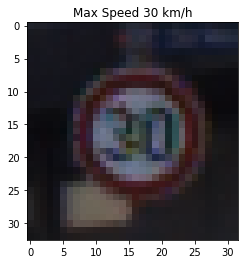

SHAPE:  (33, 32, 3)


array([[[0.1254902 , 0.1372549 , 0.16862745],
        [0.12156863, 0.12941176, 0.15686275],
        [0.12156863, 0.1254902 , 0.16078431],
        ...,
        [0.08235294, 0.10196078, 0.14901961],
        [0.07058824, 0.09803922, 0.14901961],
        [0.06666667, 0.09803922, 0.14901961]],

       [[0.09411765, 0.10196078, 0.1254902 ],
        [0.09803922, 0.10196078, 0.12156863],
        [0.10196078, 0.10196078, 0.1254902 ],
        ...,
        [0.14509804, 0.16470588, 0.21960784],
        [0.12941176, 0.15686275, 0.21176471],
        [0.11372549, 0.14509804, 0.2       ]],

       [[0.09019608, 0.09411765, 0.11764706],
        [0.09411765, 0.09411765, 0.11764706],
        [0.09411765, 0.09411765, 0.12156863],
        ...,
        [0.16470588, 0.18823529, 0.25882353],
        [0.14509804, 0.17647059, 0.24313725],
        [0.1372549 , 0.16862745, 0.23529412]],

       ...,

       [[0.1254902 , 0.11764706, 0.1254902 ],
        [0.11372549, 0.10588235, 0.10980392],
        [0.09803922, 0

In [ ]:
images = x_train
names = y_train_names
index = 1535

PlotPicture(images, names, index)
print('SHAPE: ',images[index].shape)
images[index]

In [ ]:
# Target resize parameters:
img_width = 30
img_height = 30
channels = 3

### Resize **x_train**

In [ ]:
# Resize whole train image dataset:

def Recover_x_train_resized():
  return LoadNumpy("all_train_images_resized", data_dir + "numpy/")

In [ ]:
if "all_train_images_resized.npy" in os.listdir(data_dir + "numpy/"):
  x_train_resized = Recover_x_train()

else:

  x_train_resized = np.array([ resize(image, (img_width, img_height)) for image in x_train])
  SaveNumpy("all_train_images_resized", data_dir + "numpy/", x_train_resized)

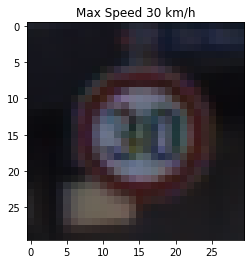

SHAPE:  (30, 30, 3)


array([[[0.12380392, 0.13524183, 0.1660915 ],
        [0.12041176, 0.12766667, 0.1554902 ],
        [0.11862745, 0.12238562, 0.15839869],
        ...,
        [0.08810458, 0.10643791, 0.15529412],
        [0.07472549, 0.10139216, 0.15219608],
        [0.06916993, 0.10041176, 0.15158824]],

       [[0.09366013, 0.10078431, 0.12420261],
        [0.09778431, 0.10078431, 0.12137255],
        [0.09892157, 0.09957516, 0.12490196],
        ...,
        [0.15045752, 0.17      , 0.2303268 ],
        [0.13339216, 0.16064706, 0.21737255],
        [0.11773856, 0.149     , 0.20566667]],

       [[0.08934641, 0.09313725, 0.11669935],
        [0.09323529, 0.09323529, 0.11803922],
        [0.09297386, 0.09346405, 0.12156863],
        ...,
        [0.15      , 0.17205882, 0.24901961],
        [0.13490196, 0.16362745, 0.23470588],
        [0.12669935, 0.15611111, 0.22575163]],

       ...,

       [[0.13075163, 0.12385621, 0.13153595],
        [0.11117647, 0.10294118, 0.10627451],
        [0.09199346, 0

In [ ]:
# Test x_train_resized
images = x_train_resized
names = y_train_names
index = 1535

PlotPicture(images, names, index)
print('SHAPE: ', images[index].shape)
images[index]

### Resize **x_test**

In [ ]:
# Resize whole test image dataset:

def Recover_x_test_resized():
  return LoadNumpy("all_test_images_resized", data_dir + "numpy/")

In [ ]:
if "all_test_images_resized.npy" in os.listdir(data_dir + "numpy/"):
  x_test_resized = Recover_x_test_resized()

else:

  x_test_resized = np.array([resize(image, (img_width, img_height)) for image in x_test])
  SaveNumpy("all_test_images_resized", data_dir + "numpy/", x_test_resized)

Trial cell to test picture loading:

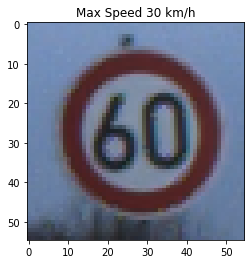

SHAPE:  (55, 55, 3)


array([[[0.46666667, 0.57647059, 0.74117647],
        [0.4745098 , 0.57254902, 0.7372549 ],
        [0.48627451, 0.57647059, 0.74117647],
        ...,
        [0.48627451, 0.58039216, 0.72941176],
        [0.48235294, 0.58039216, 0.72156863],
        [0.47843137, 0.58431373, 0.73333333]],

       [[0.47058824, 0.58039216, 0.74901961],
        [0.4745098 , 0.57647059, 0.7372549 ],
        [0.48627451, 0.58431373, 0.74509804],
        ...,
        [0.4745098 , 0.56862745, 0.71372549],
        [0.4745098 , 0.57254902, 0.70196078],
        [0.47843137, 0.58039216, 0.7254902 ]],

       [[0.4627451 , 0.57254902, 0.72941176],
        [0.47058824, 0.58039216, 0.72941176],
        [0.4627451 , 0.57254902, 0.72941176],
        ...,
        [0.47843137, 0.57254902, 0.72941176],
        [0.46666667, 0.56078431, 0.70980392],
        [0.4745098 , 0.57254902, 0.73333333]],

       ...,

       [[0.25490196, 0.28627451, 0.35294118],
        [0.25490196, 0.28627451, 0.35686275],
        [0.24705882, 0

In [ ]:
# Check x_test
images = x_test
names = y_train_names
index = 1535

PlotPicture(images, names, index)
print('SHAPE: ', images[index].shape)
images[index]

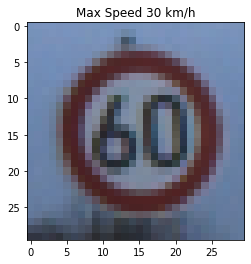

SHAPE:  (30, 30, 3)


array([[[0.47131519, 0.57653113, 0.74115499],
        [0.48561058, 0.57980463, 0.74214339],
        [0.4862204 , 0.58089445, 0.74577218],
        ...,
        [0.48895748, 0.58283547, 0.73781165],
        [0.48295505, 0.5772181 , 0.7273278 ],
        [0.47852371, 0.57970556, 0.7223617 ]],

       [[0.46425343, 0.57399142, 0.72577892],
        [0.46582391, 0.57351318, 0.73170555],
        [0.47729137, 0.5722852 , 0.73218031],
        ...,
        [0.47441149, 0.57142324, 0.7337889 ],
        [0.47873703, 0.57405048, 0.73606652],
        [0.47221991, 0.56916318, 0.72918881]],

       [[0.45585372, 0.56846196, 0.71603218],
        [0.46006245, 0.57072306, 0.72649163],
        [0.48382328, 0.56547008, 0.72273   ],
        ...,
        [0.46153057, 0.57034382, 0.73487633],
        [0.46821784, 0.5737807 , 0.73878869],
        [0.46726534, 0.56885512, 0.72887954]],

       ...,

       [[0.3428895 , 0.40833107, 0.52636849],
        [0.34021993, 0.38541617, 0.48205221],
        [0.28262919, 0

In [ ]:
# Check x_test_resized
images = x_test_resized
names = y_train_names
index = 1535

PlotPicture(images, names, index)
print('SHAPE: ', images[index].shape)
images[index]

### 2.1.2 Shuffle train pictures
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Shuffle train pictures:

shuffle_indexes = np.arange(x_train_resized.shape[0])
np.random.shuffle(shuffle_indexes)

x_train_resized = x_train_resized[shuffle_indexes]
y_train = y_train[shuffle_indexes]


### 2.1.3 Split training set into tran and validation set
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Split the train data into train and validation set:

X_train, X_val, Y_train, Y_val = train_test_split(x_train_resized, y_train, test_size=0.3, random_state=42, shuffle=True)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", Y_train.shape)
print("y_valid.shape", Y_val.shape)


X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Trial cell to check picture loading:

In [ ]:
index = 14673

plt.figure()
plt.imshow(X_train[index, ], cmap = 'gray')
plt.title(Y_train[index])
plt.show()

In [ ]:
# One hot encoding the labels:

Y_train = keras.utils.to_categorical(Y_train, len(class_names))
Y_val = keras.utils.to_categorical(Y_val, len(class_names))

print(Y_train.shape)
print(Y_val.shape)


## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3 Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a CNN model:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])



### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Discuss CNN model and add more layers if neccesary:






## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, np.array(Y_train), epochs = 30, validation_data=(X_val, np.array(Y_val)))

Epoch 1/30
858/858 [==============================] - 32s 20ms/step - loss: 0.8958 - accuracy: 0.7677 - val_loss: 0.2471 - val_accuracy: 0.9341
Epoch 2/30
858/858 [==============================] - 13s 16ms/step - loss: 0.1391 - accuracy: 0.9631 - val_loss: 0.0964 - val_accuracy: 0.9770
Epoch 3/30
858/858 [==============================] - 13s 16ms/step - loss: 0.0719 - accuracy: 0.9821 - val_loss: 0.0457 - val_accuracy: 0.9900
Epoch 4/30
858/858 [==============================] - 12s 14ms/step - loss: 0.0476 - accuracy: 0.9892 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 5/30
858/858 [==============================] - 13s 15ms/step - loss: 0.0334 - accuracy: 0.9926 - val_loss: 0.0272 - val_accuracy: 0.9940
Epoch 6/30
858/858 [==============================] - 13s 15ms/step - loss: 0.0258 - accuracy: 0.9946 - val_loss: 0.0233 - val_accuracy: 0.9954
Epoch 7/30
858/858 [==============================] - 13s 15ms/step - loss: 0.0195 - accuracy: 0.9960 - val_loss: 0.0272 - val_accuracy:

In [ ]:
model.evaluate(x_test_resized, y_test)

395/395 [==============================] - 4s 9ms/step - loss: 0.0944 - accuracy: 0.9757


[0.09436023235321045, 0.9756928086280823]

## Save model

In [ ]:
# Save model
from datetime import datetime
now = datetime.now() # time object

save_path = cmt307g12_dir + "saved_models/" + str(now).replace(" ","_").replace(":","-").split(".")[0]
model.save(save_path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/cmt307-g12/saved_models/2022-03-15_00-04-59/assets


## Load model

In [ ]:
new_model = tf.keras.models.load_model('saved_models/00-24-37-912214')

## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

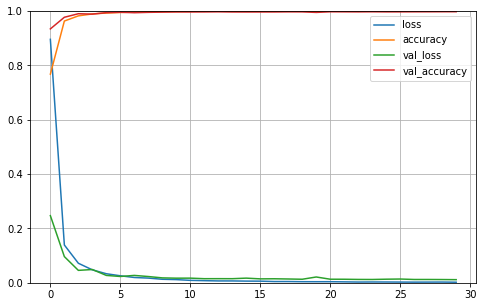

In [ ]:
# Plot accuracy vs loss performance and discuss the need of data augmentation:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
prediction = model.predict(x_test_resized[:])
print(prediction)

[[4.2218124e-07 1.3584058e-08 7.8842169e-11 ... 4.8468378e-06
  2.5365709e-06 5.4164030e-07]
 [5.1053848e-06 9.9989343e-01 2.1010135e-05 ... 6.7298561e-07
  3.8705181e-07 4.3951667e-07]
 [1.2063067e-09 4.2877507e-11 2.9628028e-10 ... 3.3203298e-09
  2.8208297e-10 4.4727417e-09]
 ...
 [2.2470980e-04 1.4454405e-03 1.6827795e-05 ... 4.6191234e-04
  5.5982033e-03 1.9439694e-02]
 [9.7843916e-08 3.3764277e-07 3.5130647e-08 ... 2.6089160e-06
  6.4639437e-08 5.4029597e-06]
 [9.3566848e-07 9.3634762e-09 9.4810282e-05 ... 1.4564823e-06
  9.7851239e-07 3.2135616e-05]]


In [ ]:
x_test_resized.shape

(12630, 30, 30, 3)

In [ ]:
classes_x

array([16,  1, 38, ..., 38,  7, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


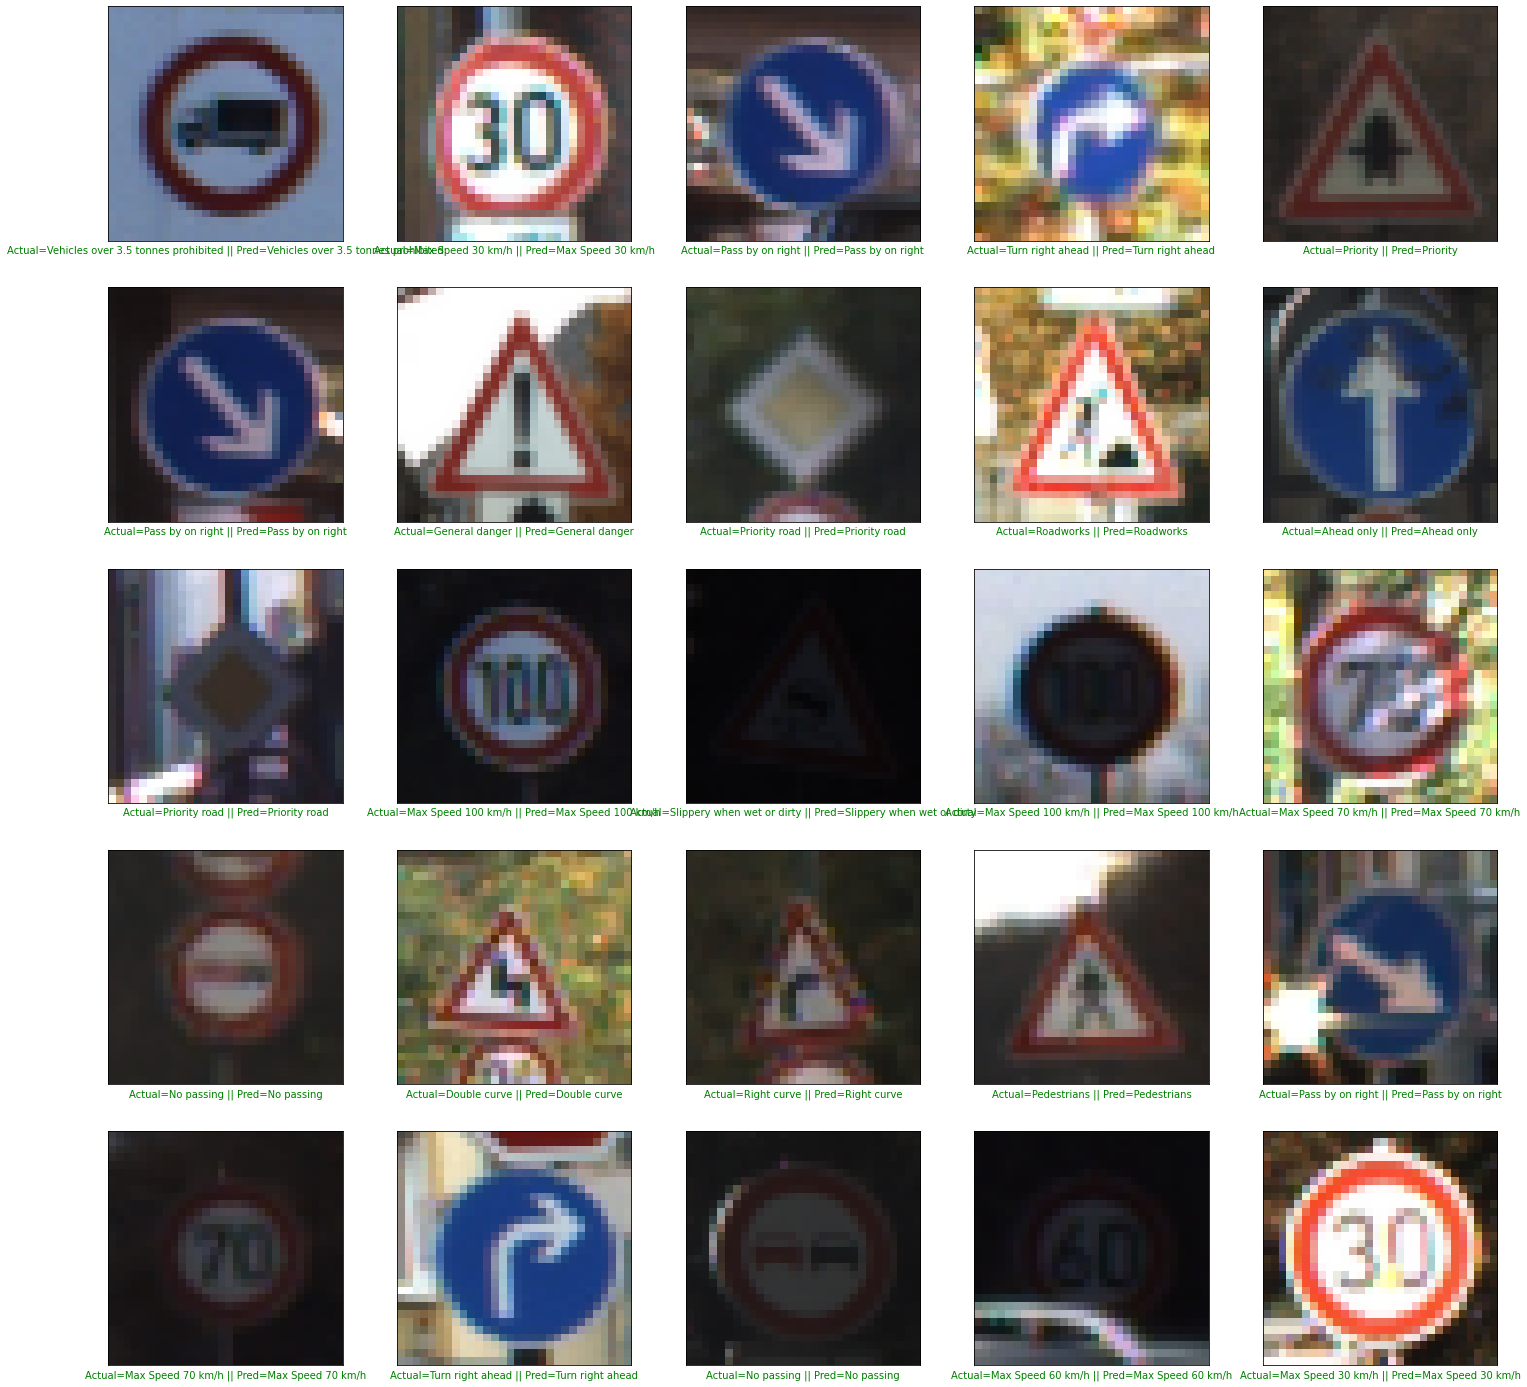

In [ ]:
pred = model.predict(x_test_resized) 
classes_x = np.argmax(pred,axis=1)

plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = class_names[classes_x[start_index + i]]
    actual = y_test_names[start_index + i]
    col = 'g'

    #if prediction != actual:
    #    col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)

    plt.imshow(x_test_resized[start_index + i])

plt.show()